In [74]:
# https://www.geeksforgeeks.org/bitcoin-price-prediction-using-machine-learning-in-python/

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

from main_funcs import get_and_update_data


In [76]:
from binance.enums import HistoricalKlinesType

df = get_and_update_data("BTCUSDT", "4h", HistoricalKlinesType.SPOT, "Germany")
df = df[["open", "high", "low", "close", "volume"]]
df

Start Time: 2023-11-10T12:00:00.100000000
IP from 'Germany' . its OK!
start get data from binance: 2023-11-10 21:49:03.310887
Getting Data ...
finish get data from binance: 2023-11-10 21:49:04.281746
0 radif data gerefte shod az binance
etelaat jadidi mojod nist


,open,high,low,close,volume
open_time,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...
2023-11-09 23:30:00,36382.21,36784.57,36139.57,36701.09,7494.969520
2023-11-10 03:30:00,36701.10,36919.06,36446.20,36733.27,5576.159630
2023-11-10 07:30:00,36733.27,36807.69,36427.61,36439.98,6598.979340


In [77]:
df.shape

(13643, 5)

In [78]:
df.describe()

,open,high,low,close,volume
count,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000
mean,20463.639497,20680.245963,20230.425119,20466.109290,12364.084687
std,15808.719724,15982.043080,15622.807258,15808.744028,15962.805684
min,2870.900000,3148.000000,2817.000000,2919.000000,0.000000
25%,7863.290000,7952.545000,7750.000000,7864.705000,4315.234022
50%,13578.980000,13850.000000,13301.990000,13578.980000,7289.780400
75%,29808.005000,29986.650000,29539.585000,29813.220000,13368.444516
max,68490.000000,69000.000000,67627.140000,68490.000000,284711.694213


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13643 entries, 2017-08-17 07:30:00 to 2023-11-10 15:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    13643 non-null  float64
 1   high    13643 non-null  float64
 2   low     13643 non-null  float64
 3   close   13643 non-null  float64
 4   volume  13643 non-null  float64
dtypes: float64(5)
memory usage: 639.5 KB


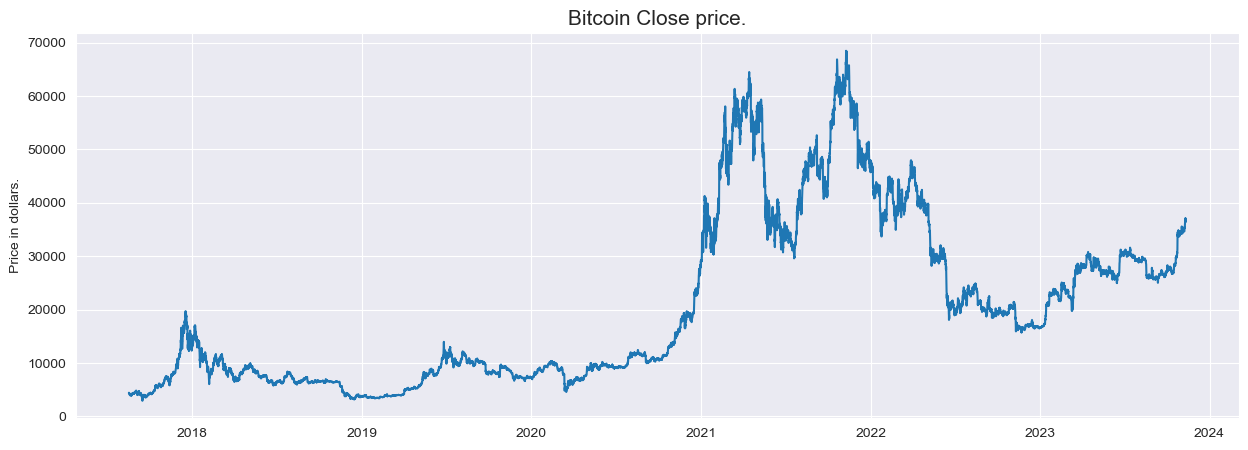

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


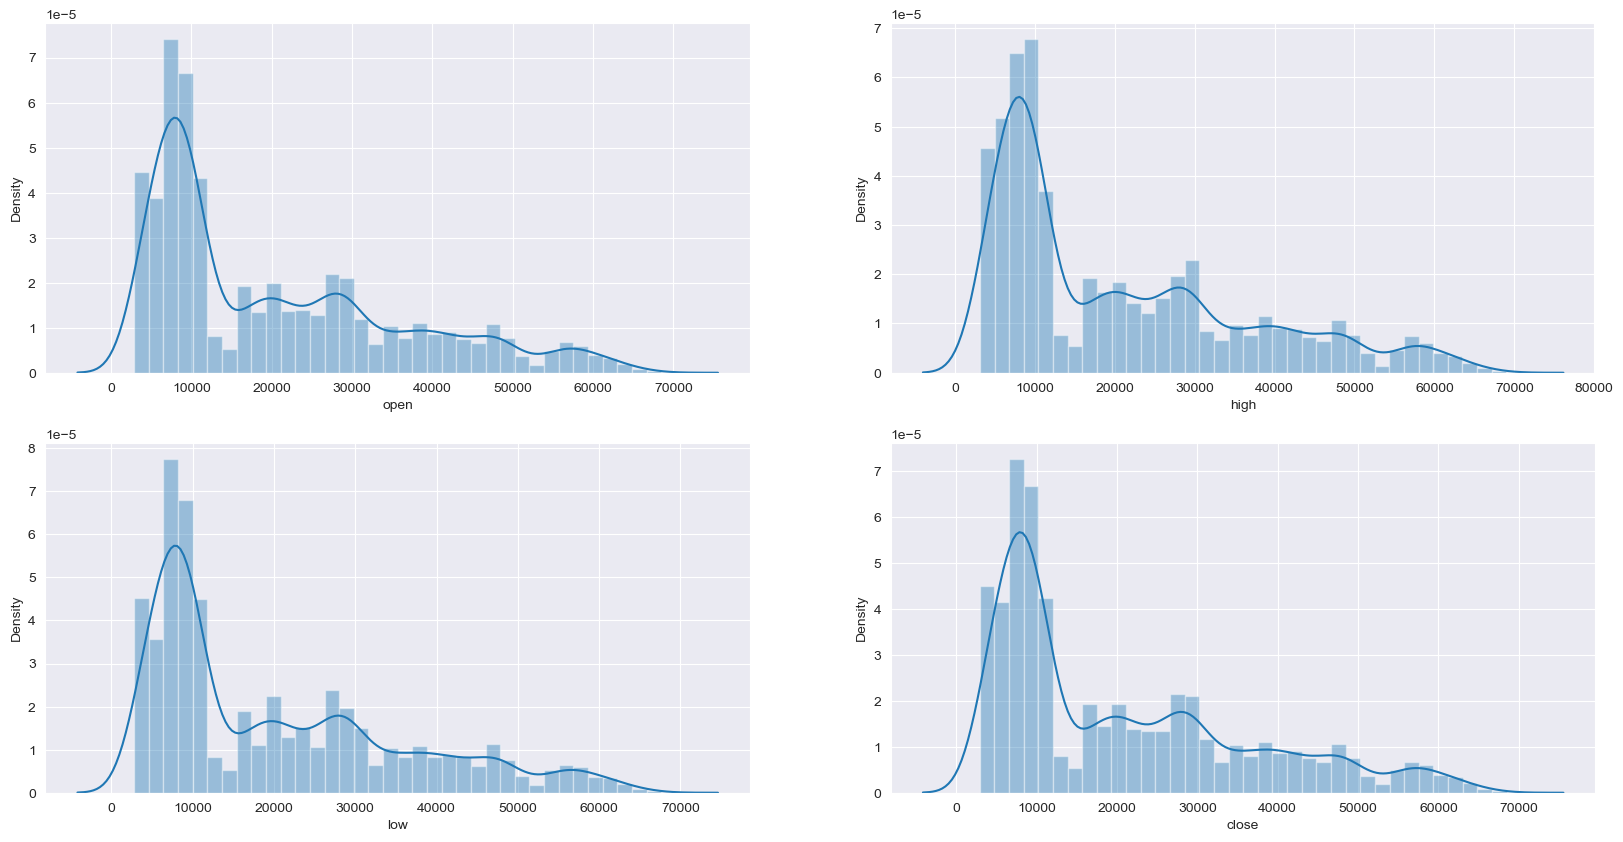

In [81]:
features = ['open', 'high', 'low', 'close']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.distplot(df[col])
plt.show()


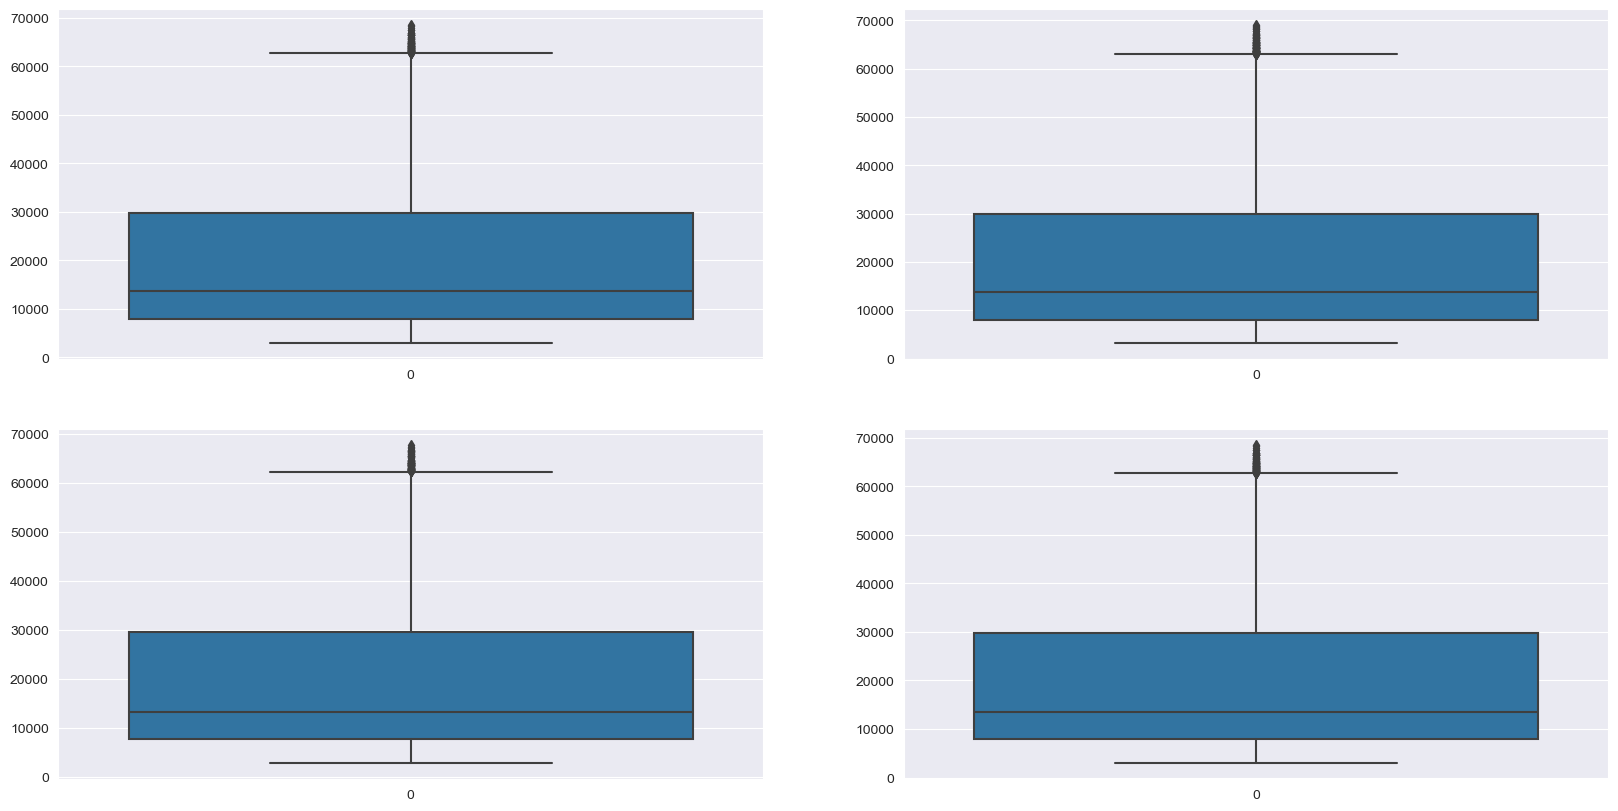

In [82]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col])
plt.show()


In [83]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df.head()

,open,high,low,close,volume,year,month,day
open_time,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,2017,8,17
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,2017,8,17
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,2017,8,17
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,2017,8,17
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,2017,8,17


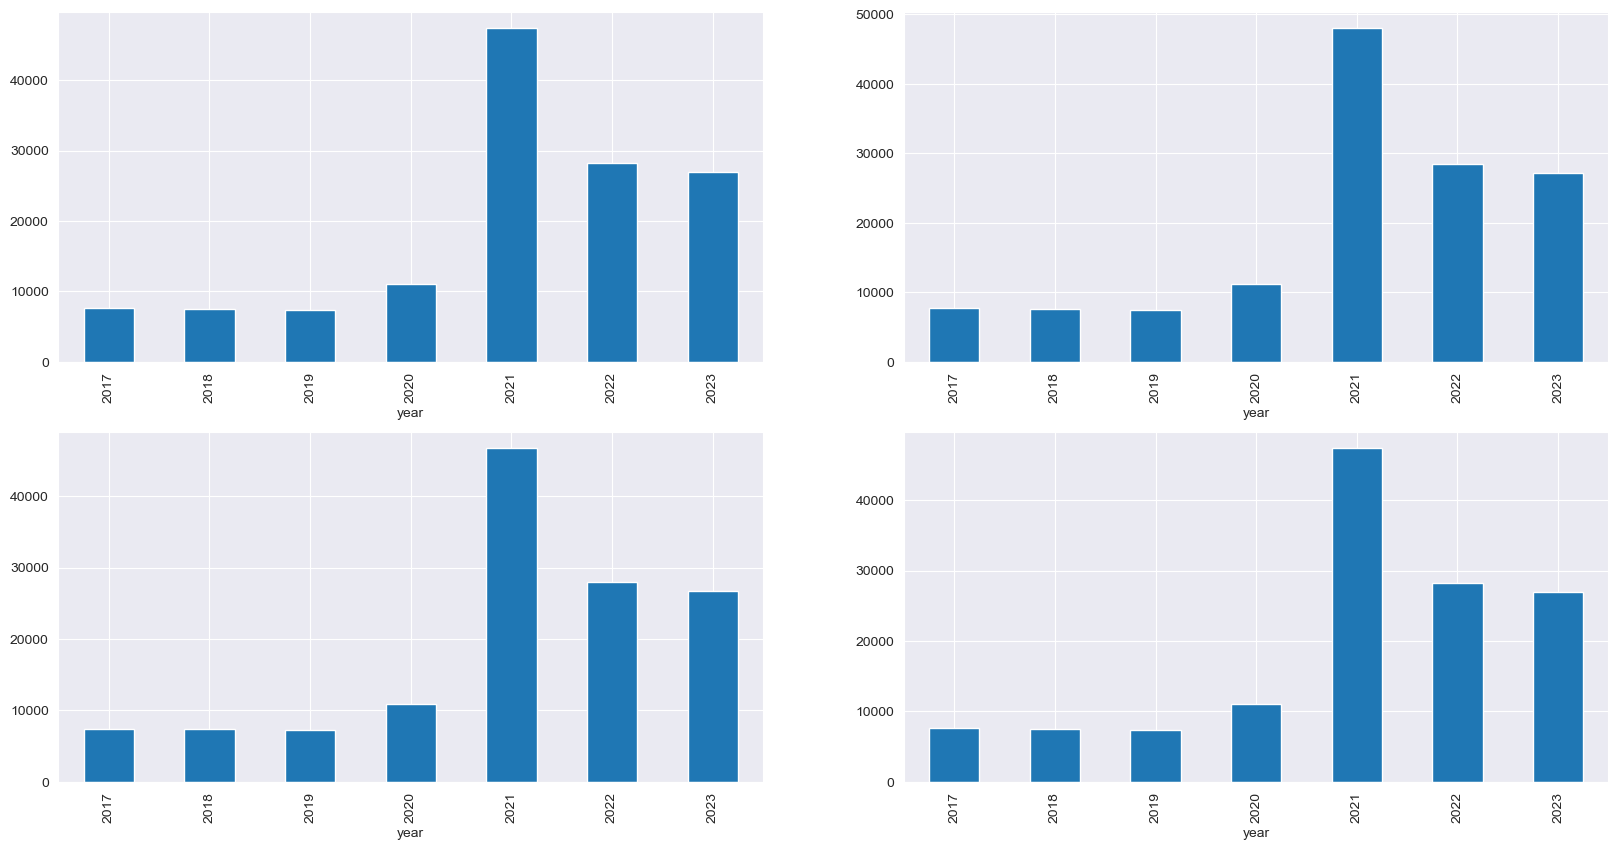

In [84]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
plt.show()


In [85]:

df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df.head()

,open,high,low,close,volume,year,month,day,is_quarter_end
open_time,,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,2017,8,17,0
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,2017,8,17,0
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,2017,8,17,0
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,2017,8,17,0
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,2017,8,17,0


In [86]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
df

,open,high,low,close,volume,year,month,day,is_quarter_end,open-close,low-high,target
open_time,,,,,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,2017,8,17,0,-88.51,-88.67,1
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,2017,8,17,0,-93.98,-152.07,0
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,2017,8,17,0,83.72,-151.97,0
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,2017,8,17,0,27.10,-154.10,0
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,2017,8,17,0,22.48,-111.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09 23:30:00,36382.21,36784.57,36139.57,36701.09,7494.969520,2023,11,9,0,-318.88,-645.00,1
2023-11-10 03:30:00,36701.10,36919.06,36446.20,36733.27,5576.159630,2023,11,10,0,-32.17,-472.86,0
2023-11-10 07:30:00,36733.27,36807.69,36427.61,36439.98,6598.979340,2023,11,10,0,293.29,-380.08,1


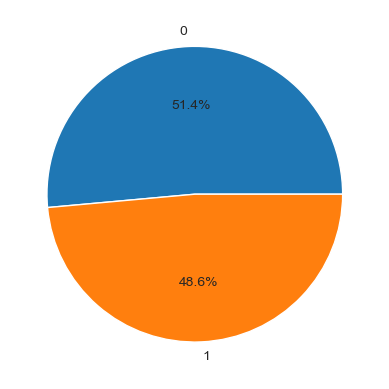

In [87]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

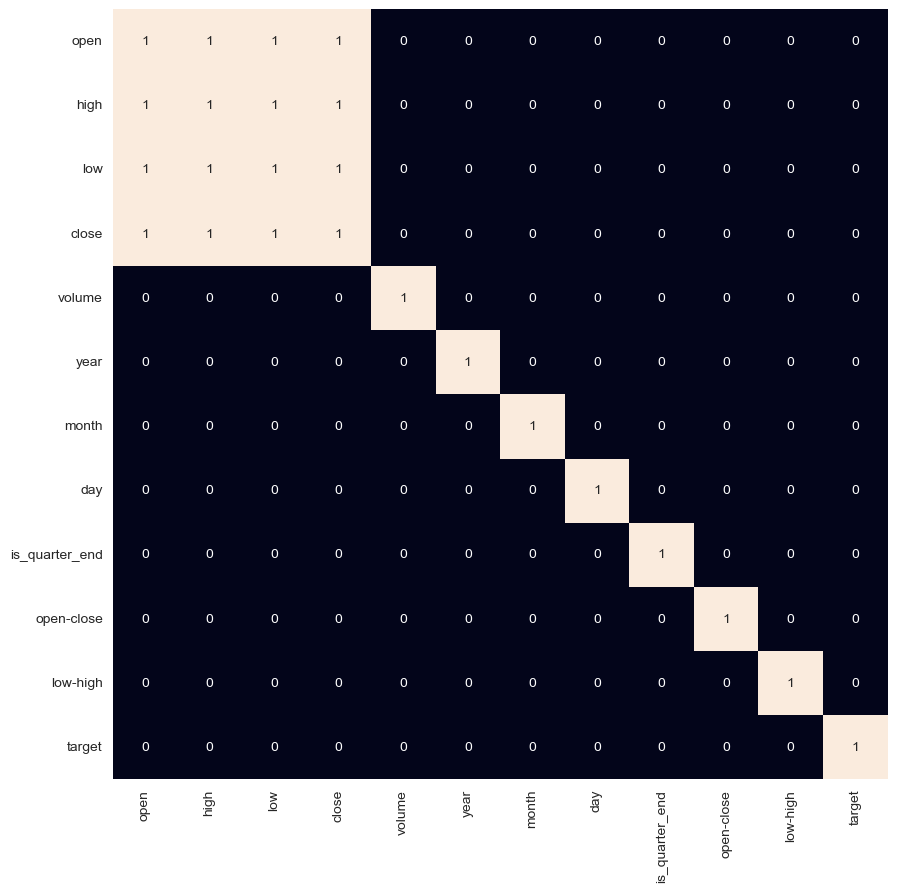

In [88]:

plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [89]:
# features = df[['open-close', 'low-high', 'is_quarter_end']]
features = df[['open-close', 'low-high' ]] # webneshin edited
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(12278, 2) (1365, 2)


In [90]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5544054777975359
Validation Accuracy :  0.5564167561761547

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.525437441973609
Validation Accuracy :  0.527203007518797

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

In [91]:
df

,open,high,low,close,volume,year,month,day,is_quarter_end,open-close,low-high,target
open_time,,,,,,,,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865,2017,8,17,0,-88.51,-88.67,1
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882,2017,8,17,0,-93.98,-152.07,0
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001,2017,8,17,0,83.72,-151.97,0
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716,2017,8,17,0,27.10,-154.10,0
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913,2017,8,17,0,22.48,-111.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-09 23:30:00,36382.21,36784.57,36139.57,36701.09,7494.969520,2023,11,9,0,-318.88,-645.00,1
2023-11-10 03:30:00,36701.10,36919.06,36446.20,36733.27,5576.159630,2023,11,10,0,-32.17,-472.86,0
2023-11-10 07:30:00,36733.27,36807.69,36427.61,36439.98,6598.979340,2023,11,10,0,293.29,-380.08,1
